In [1]:
from encoder import *
from decoder import *
from dataset import *
import gin

In [2]:
gin.parse_config_file("config/encoder_config1.gin")
encoder_config = EncoderConfig()

In [3]:
gin.parse_config_file("config/decoder_config1.gin")
decoder_config = DecoderConfig()

In [5]:
encoder = EncoderModel(encoder_config)
decoder = DecoderModel(decoder_config)

In [6]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

In [7]:
img, class_name = next(iter(train_dataloader))
img.shape, class_name

(torch.Size([1, 3, 128, 128]), ('unlabeled',))

In [8]:
encoder_op, mask, ids_restore = encoder(img)
decoder_op = decoder((encoder_op, mask, ids_restore), img)

In [9]:
decoder_op[0].shape, decoder_op[1]

(torch.Size([1, 3, 128, 128]), tensor(1.7463, grad_fn=<MseLossBackward0>))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.3030953..2.2078965].


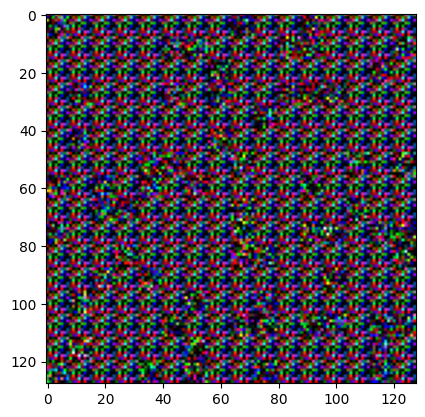

In [10]:
import matplotlib.pyplot as plt
plt.imshow(decoder_op[0].squeeze(0).detach().cpu().permute(1, 2, 0));

In [11]:
torch.save(encoder.state_dict(), 'encoder.pth')